In [1]:
image_shape  = (56,64,1)
train_path = "D:\\Projects\\EYE_GAME\\eye_img\\datav2\\train\\"
test_path  = "D:\\Projects\\EYE_GAME\\eye_img\\datav2\\test\\"


In [2]:
import os
import pandas as pd
from glob import glob
import numpy as np 
import matplotlib as plt
from matplotlib.image import imread 
import seaborn as sns 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline


In [2]:
os.listdir(train_path)

['center', 'left', 'right']

In [4]:

img=imread(train_path+'left\\'+'68.jpg')

In [5]:
folders=glob(test_path + '/*')


In [6]:
traindata_gen=ImageDataGenerator(
                             rotation_range=10,
                             rescale=1/255.,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.1,
                             fill_mode='nearest'
                              )

testdata_gen=ImageDataGenerator(
                             
                             rescale=1./255)

In [7]:
traindata_gen.flow_from_directory(train_path)

Found 3622 images belonging to 3 classes.


In [8]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='same',input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1, padding='same',input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), strides=1, padding='same',input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(len(folders)))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 56, 64, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 7168)              0

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [11]:
batch_size = 32
traning_set=traindata_gen.flow_from_directory(train_path,
                                              target_size =image_shape[:2],
                                                 batch_size = batch_size,
                                                 color_mode="grayscale",
                                                 class_mode = 'categorical')

Found 3622 images belonging to 3 classes.


In [12]:
testing_set=testdata_gen.flow_from_directory(test_path,
                                            target_size = image_shape[:2],
                                                 batch_size = batch_size,
                                                 color_mode="grayscale",
                                                 class_mode = 'categorical',
                                            shuffle=False)

Found 831 images belonging to 3 classes.


In [13]:
testing_set.class_indices

{'down': 0, 'left': 1, 'right': 2}

In [14]:
result = model.fit(
  traning_set,
  epochs=8,
  validation_data=testing_set,
  callbacks=[early_stop]
    
)

Epoch 1/8
114/114 [==============================] - 36s 318ms/step - loss: 0.2817 - accuracy: 0.8755 - val_loss: 0.0243 - val_accuracy: 0.9964
Epoch 2/8
114/114 [==============================] - 4s 37ms/step - loss: 0.0665 - accuracy: 0.9796 - val_loss: 0.0302 - val_accuracy: 0.9856
Epoch 3/8
114/114 [==============================] - 4s 36ms/step - loss: 0.0440 - accuracy: 0.9859 - val_loss: 0.0425 - val_accuracy: 0.9795


In [15]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

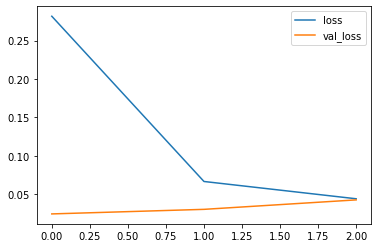

In [16]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

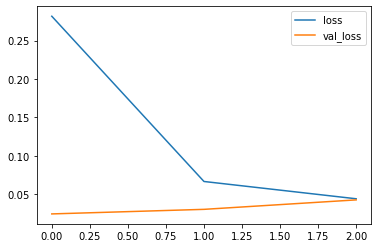

In [17]:
losses[['loss','val_loss']].plot()


In [18]:
model.metrics_names

['loss', 'accuracy']

In [20]:
model.save('gazev3.1.h5')